# Nithya Ramesh

# Data Science and Business Analytics intern
# @The Sparks Foundation(TSF)

# Task 3(Exploratory Data Analysis - Retail)

#### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
#### As a business manager, try to find out the weak areas where you can work to make more profit.
#### What all business problems you can derive by exploring the data?

#### Importing Libraries Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading and Displaying Dataset

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


#### Statistical Information of the dataframe¶

In [4]:
data.describe()

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Removing Duplicates

In [7]:
sum(data.duplicated(subset=None, keep='first'))

17

In [8]:
data.drop_duplicates(subset=None,keep='first',inplace=True)

In [9]:
data.shape

(9977, 13)

In [10]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in data.columns.values if len(data[i].unique()) < threshold_categories and len(data[i].unique()) > 1]
    
    fig = plt.figure(figsize = (15,15))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 3.0)
    plt.show()

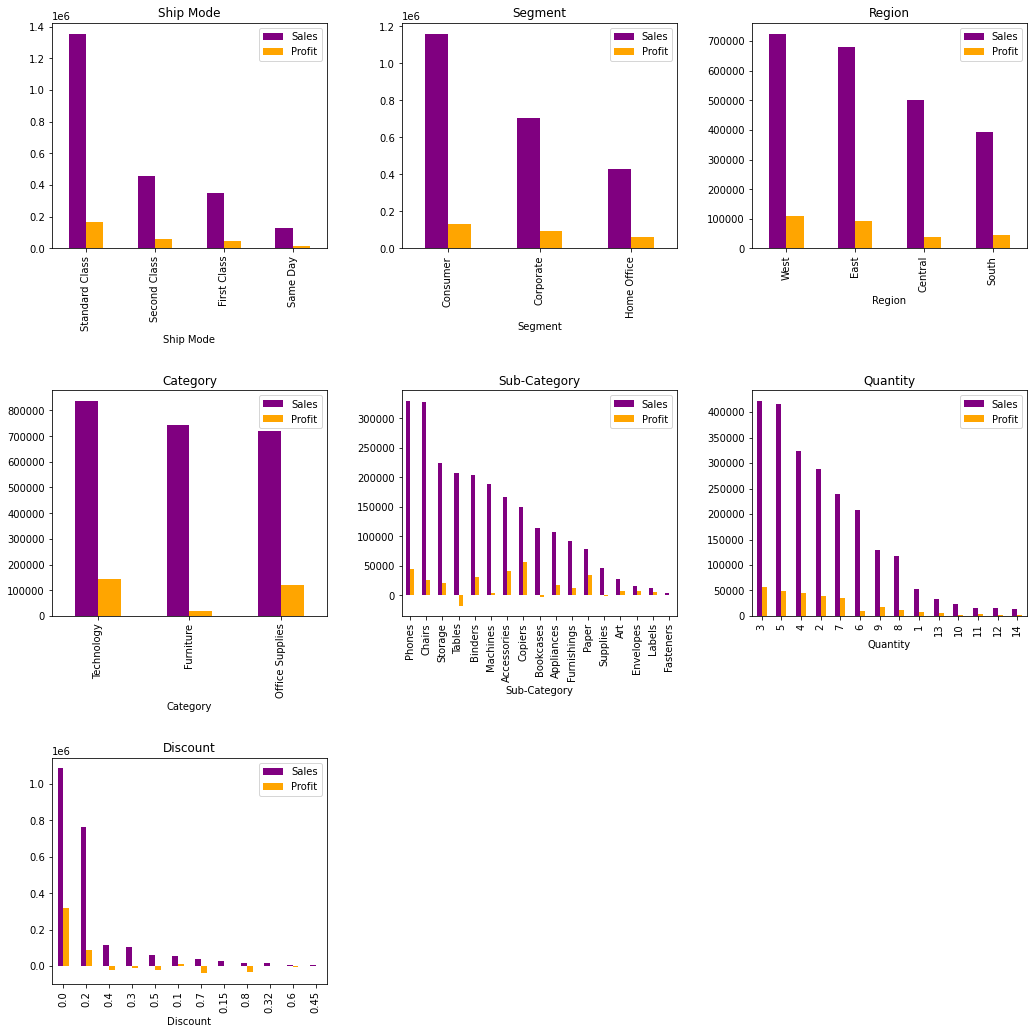

In [11]:
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["purple", "orange"]
getUnique(data, target_variable, sort_by, color, num_categories)


In [12]:
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

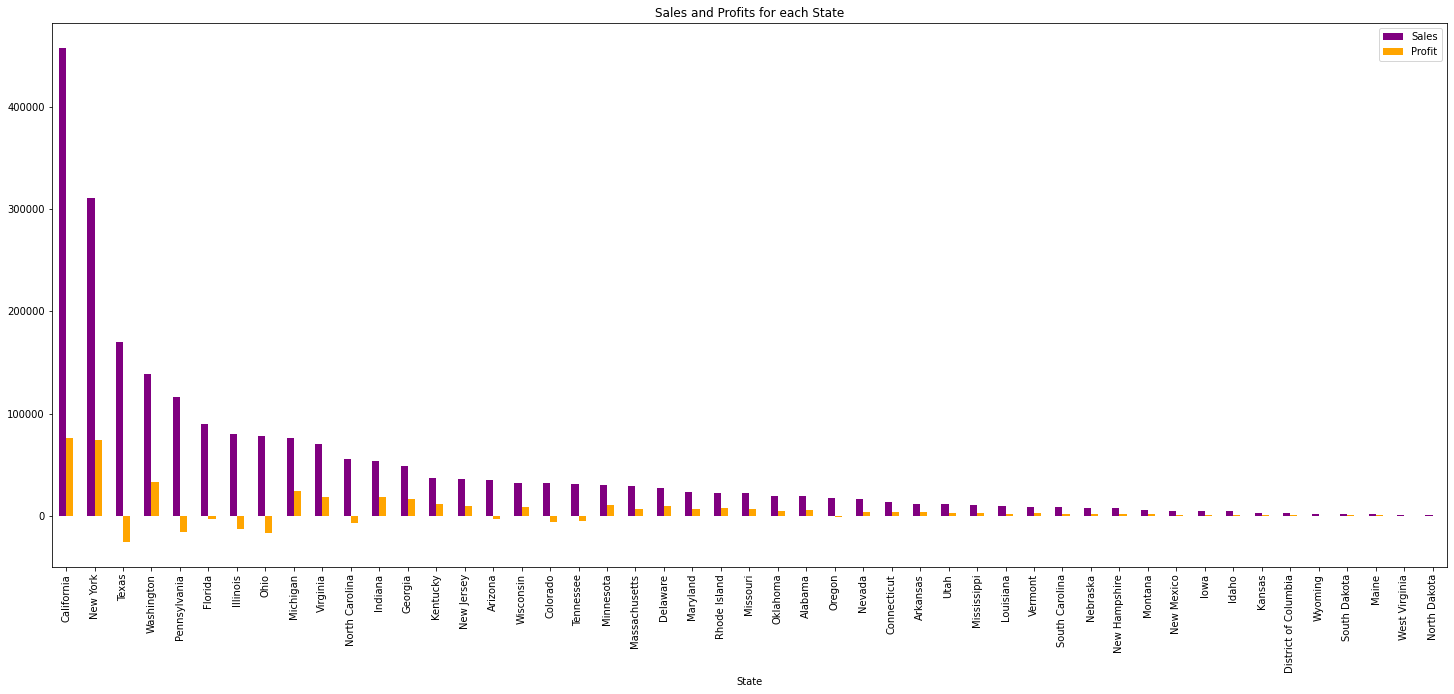

In [13]:
plt.rcParams["figure.figsize"] = [25,10]
data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["purple", "orange"])
plt.title("Sales and Profits for each State")
plt.show()

In [14]:
data.groupby("State").sum()['Discount'].sort_values(ascending = False)

State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

In [15]:
states_df = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_df

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70
Florida,89473.7080,-3399.3017,114.65
Illinois,80162.5370,-12601.6500,191.10
Ohio,77976.7640,-16959.3178,152.10
Michigan,75879.6440,24428.0903,1.80


In [16]:
states_df['Discount'][states_df['Profit'] < 0].sort_values(ascending = True)

State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

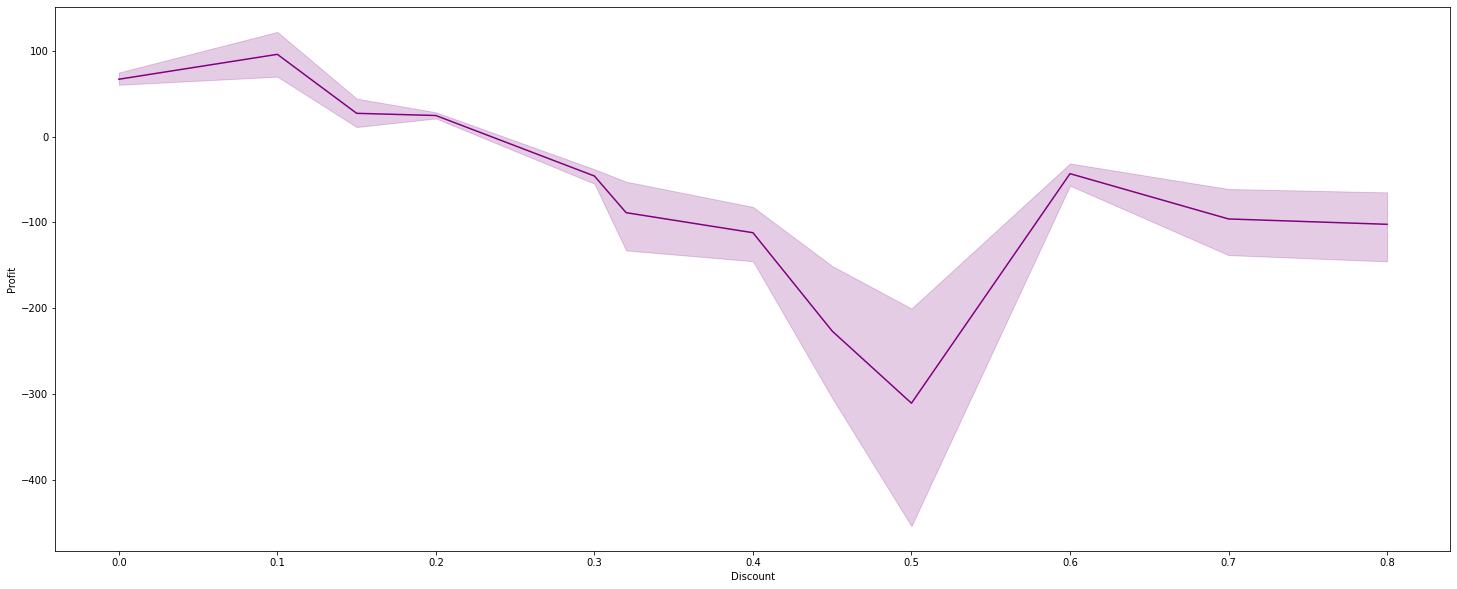

In [17]:
import seaborn as sns
sns.lineplot(x = "Discount", y = "Profit", data = data, color ="purple")
plt.show()

#### THANK YOU